In [21]:
import os
#os.chdir('/home/henri/Documents/')

In [22]:
import tensorflow as tf
import numpy as np
import sys

from magenta.common import tf_lib

In [23]:
#from magenta.models.rl_tuner import rl_tuner
#from magenta.models.rl_tuner import rl_tuner_ops
import rl_tuner
import rl_tuner_ops

In [24]:
# Place to save your model checkpoints and composi
SAVE_PATH = "/home/henri/Documents/Git/magenta/magenta/models/rl_tuner/save_path/"

In [25]:
# Model parameter settings
ALGORITHM = 'q'
REWARD_SCALER = 1
OUTPUT_EVERY_NTH = 50000
NUM_NOTES_IN_COMPOSITION = 32
PRIME_WITH_MIDI = False

In [26]:
rl_tuner_hparams = tf_lib.HParams(random_action_probability=0.1,
                                  store_every_nth=1,
                                  train_every_nth=5,
                                  minibatch_size=32,
                                  discount_rate=0.5,
                                  max_experience=100000,
                                  target_network_update_rate=0.01)

## Train network

In [27]:
reload(rl_tuner_ops)
reload(rl_tuner)
rl_tuner.reload_files()

In [28]:
rl_net = rl_tuner.RLTuner(SAVE_PATH, 
                          dqn_hparams=rl_tuner_hparams, 
                          algorithm=ALGORITHM,
                          reward_scaler=REWARD_SCALER,
                          output_every_nth=OUTPUT_EVERY_NTH,
                          num_notes_in_melody=NUM_NOTES_IN_COMPOSITION)

Retrieving checkpoint of Note RNN from Magenta download server.
INFO:tensorflow:Initializing q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope q_network
INFO:tensorflow:Initializing target q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope target_q_network
INFO:tensorflow:Initializing reward network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope reward_rnn
INFO:tensorflow:Q network cell: <tensorflow.contrib.rnn.python.ops.core_rnn_cell_impl.MultiRNNCell object at 0x61914d0>
INFO:tensorflow:Adding RL graph variables
INFO:tensorflow:Adding reward computation portion of the graph
INFO:tensorflow:Adding taking action portion of graph
INFO:tensorflow:Add estimating future rewards portion of graph
INFO:tensorflow:Adding q value prediction portion of graph
INFO:tensorflow:Summary name q_network/rnn/multi_rnn_cell/cell_0/lstm_cell/weights:0 is i

INFO:tensorflow:Priming with note 14
INFO:tensorflow:Generated sequence: [20, 36, 36, 22, 33, 25, 16, 4, 31, 10, 24, 33, 6, 8, 22, 27, 25, 18, 14, 8, 19, 0, 20, 19, 2, 35, 14, 28, 24, 31, 19, 5]
Generated sequence: [20, 36, 36, 22, 33, 25, 16, 4, 31, 10, 24, 33, 6, 8, 22, 27, 25, 18, 14, 8, 19, 0, 20, 19, 2, 35, 14, 28, 24, 31, 19, 5]
INFO:tensorflow:Wrote a melody to /home/henri/Documents/Git/magenta/magenta/models/rl_tuner/save_path/
INFO:tensorflow:Visualizing note selection probabilities:


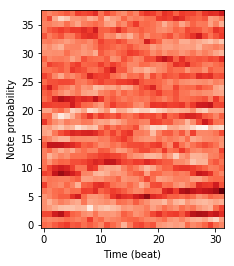

In [29]:
# Generate initial music sequence before training with RL
rl_net.generate_music_sequence(visualize_probs=True, title='pre_rl', length=32)

# This took from 22:40 - 22:53
- full training is estimated to take 46 minutes

In [30]:
rl_net.train(num_steps=300000, exploration_period=50000)

INFO:tensorflow:Evaluating initial model...
INFO:tensorflow:Evaluating model...
INFO:tensorflow:Training iteration 50000
INFO:tensorflow:	Reward for last 50000 steps: -212854.579657
INFO:tensorflow:		Music theory reward: -30805.0292076
INFO:tensorflow:		Note RNN reward: -182049.55045
Training iteration 50000
	Reward for last 50000 steps: -212854.579657
		Music theory reward: -30805.0292076
		Note RNN reward: -182049.55045
INFO:tensorflow:	Exploration probability is 0.1
INFO:tensorflow:Evaluating model...
INFO:tensorflow:Training iteration 100000
INFO:tensorflow:	Reward for last 50000 steps: -82587.5908106
INFO:tensorflow:		Music theory reward: 99363.3753764
INFO:tensorflow:		Note RNN reward: -181950.966187
Training iteration 100000
	Reward for last 50000 steps: -82587.5908106
		Music theory reward: 99363.3753764
		Note RNN reward: -181950.966187
INFO:tensorflow:	Exploration probability is 0.1
INFO:tensorflow:Evaluating model...
INFO:tensorflow:Training iteration 150000
INFO:tensorflow:

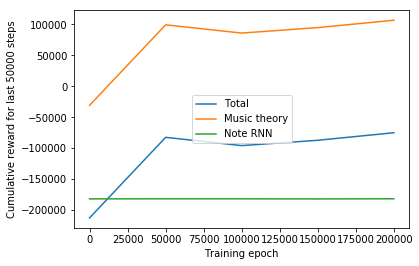

In [31]:
rl_net.plot_rewards()

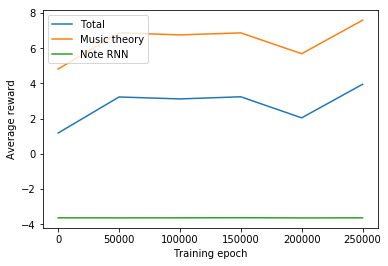

In [32]:
rl_net.plot_evaluation()

INFO:tensorflow:Priming with note 35
INFO:tensorflow:Generated sequence: [14, 13, 21, 12, 23, 18, 11, 7, 8, 14, 1, 17, 20, 15, 11, 14, 1, 12, 6, 2, 1, 14, 18, 0, 16, 9, 5, 3, 0, 1, 14, 5]
Generated sequence: [14, 13, 21, 12, 23, 18, 11, 7, 8, 14, 1, 17, 20, 15, 11, 14, 1, 12, 6, 2, 1, 14, 18, 0, 16, 9, 5, 3, 0, 1, 14, 5]
INFO:tensorflow:Wrote a melody to /home/henri/Documents/Git/magenta/magenta/models/rl_tuner/save_path/
INFO:tensorflow:Visualizing note selection probabilities:


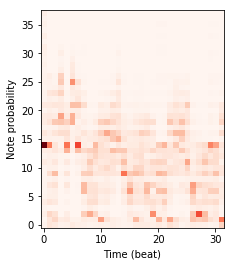

In [37]:
rl_net.generate_music_sequence(visualize_probs=True, title='post_little_rl5', length=32)

# Full Training

In [ ]:
rl_net.train(num_steps=1000000, exploration_period=500000)

INFO:tensorflow:Evaluating initial model...
INFO:tensorflow:Evaluating model...
INFO:tensorflow:Training iteration 50000
INFO:tensorflow:	Reward for last 50000 steps: -261857.566119
INFO:tensorflow:		Music theory reward: 101949.166039
INFO:tensorflow:		Note RNN reward: -363806.732159
Training iteration 50000
	Reward for last 50000 steps: -261857.566119
		Music theory reward: 101949.166039
		Note RNN reward: -363806.732159
INFO:tensorflow:	Exploration probability is 0.9042382


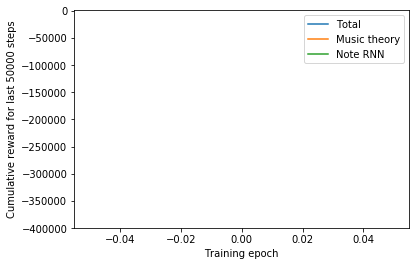

In [14]:
# Plot the rewards received during training. Improves as chance of random exploration action decreases.
rl_net.plot_rewards()

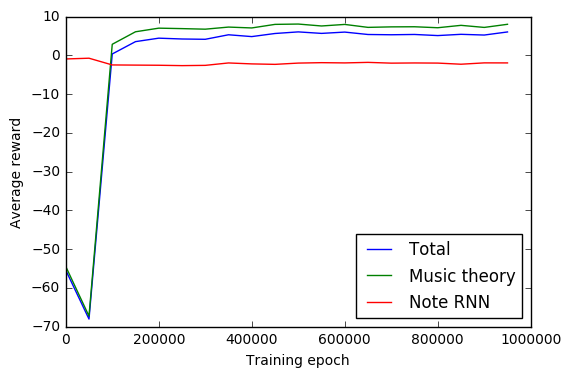

In [14]:
# Plot rewards received during calls to evaluation function throughout training. 
# Does not include exploration or random actions.
rl_net.plot_evaluation()

Generated sequence: [0, 0, 1, 23, 0, 23, 26, 0, 23, 25, 0, 26, 0, 0, 1, 30, 0, 23, 26, 0, 33, 0, 28, 26, 0, 0, 21, 0, 0, 26, 0, 0]


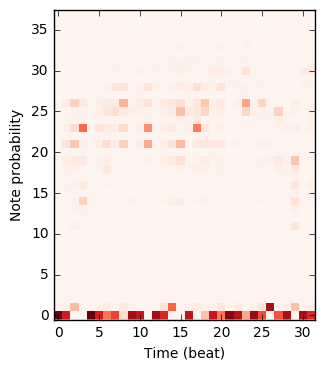

In [15]:
rl_net.generate_music_sequence(visualize_probs=True, title='post_rl')

In [16]:
# If you're happy with the model, save a version!
rl_net.save_model(SAVE_PATH, 'my_cool_model')

In [17]:
# Compute statistics about how well the model adheres to the music theory rules.
stat_dict = rl_net.evaluate_music_theory_metrics(num_compositions=100)

Total compositions: 100.0
Total notes:3200.0
	Compositions starting with tonic: 5.0
	Compositions with unique highest note:63.0
	Compositions with unique lowest note:63.0
	Number of resolved leaps:47.0
	Number of double leaps:28.0
	Notes not in key:58.0
	Notes in motif:2113.0
	Notes in repeated motif:0.0
	Notes excessively repeated:0.0

	Percent compositions starting with tonic:0.05
	Percent compositions with unique highest note:0.63
	Percent compositions with unique lowest note:0.63
	Percent of leaps resolved:0.626666666667
	Percent notes not in key:0.018125
	Percent notes in motif:0.6603125
	Percent notes in repeated motif:0.0
	Percent notes excessively repeated:0.0

	Average autocorrelation of lag1:-0.331231351539
	Average autocorrelation of lag2:0.108201559
	Average autocorrelation of lag3:-0.0560363994806

	Avg. num octave jumps per composition:0.02
	Avg. num sevenths per composition:0.03
	Avg. num fifths per composition:0.56
	Avg. num sixths per composition:0.36
	Avg. num fourths